#CafChem Active Learning dataset builder: find the minimal dataset to train a model to a specified threshold of accuracy.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioCafiero/CafChem/blob/main/notebooks/AL_DataBuild_CafChem.ipynb)

## This notebook allows you to:
- Read in a dataset, featurize with RDKit, and split into training and validation sets
- Start an Active learner using a Gaussian Processes regressor
- initiate the learner, and then loop through it until a desired threshold is reached for the R2 value of the validation set.
- Save the total training set to a new CSV, view the training R2 value.

## Requirements:
- CPU, will run on your anaconda notebook or Colab or Kaggle.

## Set-up

In [ ]:
!pip install rdkit
!pip install git+https://github.com/modAL-python/modAL.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 50.9 MB/s eta 0:00:00
  Cloning https://github.com/modAL-python/modAL.git to /tmp/pip-req-build-f127xygx
  Running command git clone --filter=blob:none --quiet https://github.com/modAL-python/modAL.git /tmp/pip-req-build-f127xygx
  Resolved https://github.com/modAL-python/modAL.git to commit bba6f6fd00dbb862b1e09259b78caf6cffa2e755
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 3.8 MB/s eta 0:00:00
  Created wheel for modAL-python: filename=modAL_python-0.4.2-py3-none-any.whl size=32646 sha256=ab2d6cae75dcab2effdbde4457e8a3e315acf0978345c4fb1f4171c68cc9e2c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-pchgpnrw/wheels/5a/f4/3d/82862c8f8da3e309feceabed046d87b2cd414bf11515b9061c
Successfully built modAL-python


In [ ]:
!git clone https://github.com/MauricioCafiero/CafChem.git

Cloning into 'CafChem'...
remote: Enumerating objects: 933, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 933 (delta 163), reused 58 (delta 58), pack-reused 721 (from 3)
Receiving objects: 100% (933/933), 45.15 MiB | 28.75 MiB/s, done.
Resolving deltas: 100% (537/537), done.


In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import time
import pickle as pkl
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

%env PYTHONWARNINGS=IGNORE::FutureWarning:sklearn

import CafChem.CafChemALDataBuild as ccal

env: PYTHONWARNINGS=IGNORE::FutureWarning:sklearn


## Build dataset with active learning
- Input is the CSV file location and the name of the target column
- Can specify to apply log transformation to the target values
- If R2 values are decreasing, restart with a different random seed

In [ ]:
maob_AL = ccal.build_data('/content/maobIC50_clean_FINAL.csv', 'IC50', True,
                     0.8, 0.4, 0.10,random_seed=42)
maob_AL.process_initial_data()

Total number of molecules: 950
Total number of descriptors per molecule: 217
Data scaled
Shape of X: (950, 217)
Shape of y: (950,)
Data split!
Length of training set: 760
Length of initial learning set: 304


Active Learner initiated!
initial data holders set!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


completed step 0


completed step 5


completed step 10


completed step 15


completed step 20


completed step 25


completed step 30


completed step 35


completed step 40


Active learning with 45 datapoints complete
Total of 45 added to previous 304 data points
MAE:               0.129
Current Validation set R2 score =      0.388
Current training set R2 score: 0.498
R2 score history:
Train Score =   0.498, Val score =   0.388, Val MAE =   0.129, total datapoints =     349


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


completed step 0


completed step 5


completed step 10


completed step 15


completed step 20


completed step 25


completed step 30


completed step 35


completed step 40


Active learning with 45 datapoints complete
Total of 45 added to previous 349 data points
MAE:               0.153
Current Validation set R2 score =      0.414
Current training set R2 score: 0.511
R2 score history:
Train Score =   0.498, Val score =   0.388, Val MAE =   0.129, total datapoints =     349
Train Score =   0.511, Val score =   0.414, Val MAE =   0.153, total datapoints =     394


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


completed step 0


completed step 5


completed step 10


completed step 15


completed step 20


completed step 25


completed step 30


completed step 35


completed step 40


Active learning with 45 datapoints complete
Total of 45 added to previous 394 data points
MAE:               0.138
Current Validation set R2 score =      0.451
Current training set R2 score: 0.557
R2 score history:
Train Score =   0.498, Val score =   0.388, Val MAE =   0.129, total datapoints =     349
Train Score =   0.511, Val score =   0.414, Val MAE =   0.153, total datapoints =     394
Train Score =   0.557, Val score =   0.451, Val MAE =   0.138, total datapoints =     439


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


completed step 0


completed step 5


completed step 10


completed step 15


completed step 20


completed step 25


completed step 30


completed step 35


completed step 40


Active learning with 45 datapoints complete
Total of 45 added to previous 439 data points
MAE:               0.157
Current Validation set R2 score =      0.461
Current training set R2 score: 0.559
R2 score history:
Train Score =   0.498, Val score =   0.388, Val MAE =   0.129, total datapoints =     349
Train Score =   0.511, Val score =   0.414, Val MAE =   0.153, total datapoints =     394
Train Score =   0.557, Val score =   0.451, Val MAE =   0.138, total datapoints =     439
Train Score =   0.559, Val score =   0.461, Val MAE =   0.157, total datapoints =     484


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


completed step 0


completed step 5


completed step 10


completed step 15


completed step 20


completed step 25


completed step 30


completed step 35


completed step 40


Active learning with 45 datapoints complete
Total of 45 added to previous 484 data points
MAE:               0.144
Current Validation set R2 score =      0.497
Current training set R2 score: 0.578
R2 score history:
Train Score =   0.498, Val score =   0.388, Val MAE =   0.129, total datapoints =     349
Train Score =   0.511, Val score =   0.414, Val MAE =   0.153, total datapoints =     394
Train Score =   0.557, Val score =   0.451, Val MAE =   0.138, total datapoints =     439
Train Score =   0.559, Val score =   0.461, Val MAE =   0.157, total datapoints =     484
Train Score =   0.578, Val score =   0.497, Val MAE =   0.144, total datapoints =     529


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


completed step 0


completed step 5


completed step 10


completed step 15


completed step 20


completed step 25


completed step 30


completed step 35


completed step 40


Active learning with 45 datapoints complete
Total of 45 added to previous 529 data points
MAE:               0.122
Current Validation set R2 score =      0.523
Current training set R2 score: 0.586
R2 score history:
Train Score =   0.498, Val score =   0.388, Val MAE =   0.129, total datapoints =     349
Train Score =   0.511, Val score =   0.414, Val MAE =   0.153, total datapoints =     394
Train Score =   0.557, Val score =   0.451, Val MAE =   0.138, total datapoints =     439
Train Score =   0.559, Val score =   0.461, Val MAE =   0.157, total datapoints =     484
Train Score =   0.578, Val score =   0.497, Val MAE =   0.144, total datapoints =     529
Train Score =   0.586, Val score =   0.523, Val MAE =   0.122, total datapoints =     574


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


completed step 0


completed step 5


completed step 10


completed step 15


completed step 20


completed step 25


completed step 30


completed step 35


completed step 40


Active learning with 45 datapoints complete
Total of 45 added to previous 574 data points
MAE:               0.071
Current Validation set R2 score =      0.558
Current training set R2 score: 0.621
R2 score history:
Train Score =   0.498, Val score =   0.388, Val MAE =   0.129, total datapoints =     349
Train Score =   0.511, Val score =   0.414, Val MAE =   0.153, total datapoints =     394
Train Score =   0.557, Val score =   0.451, Val MAE =   0.138, total datapoints =     439
Train Score =   0.559, Val score =   0.461, Val MAE =   0.157, total datapoints =     484
Train Score =   0.578, Val score =   0.497, Val MAE =   0.144, total datapoints =     529
Train Score =   0.586, Val score =   0.523, Val MAE =   0.122, total datapoints =     574
Train Score =   0.621, Val score =   0.558, Val MAE =   0.071, total datapoints =     619


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


completed step 0


completed step 5


completed step 10


completed step 15


completed step 20


completed step 25


completed step 30


completed step 35


completed step 40


Active learning with 45 datapoints complete
Total of 45 added to previous 619 data points
MAE:               0.038
Current Validation set R2 score =      0.579
Current training set R2 score: 0.656
R2 score history:
Train Score =   0.498, Val score =   0.388, Val MAE =   0.129, total datapoints =     349
Train Score =   0.511, Val score =   0.414, Val MAE =   0.153, total datapoints =     394
Train Score =   0.557, Val score =   0.451, Val MAE =   0.138, total datapoints =     439
Train Score =   0.559, Val score =   0.461, Val MAE =   0.157, total datapoints =     484
Train Score =   0.578, Val score =   0.497, Val MAE =   0.144, total datapoints =     529
Train Score =   0.586, Val score =   0.523, Val MAE =   0.122, total datapoints =     574
Train Score =   0.621, Val score =   0.558, Val MAE =   0.071, total datapoints =     619
Train Score =   0.656, Val score =   0.579, Val MAE =   0.038, total datapoints =     664


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


completed step 0


completed step 5


completed step 10


completed step 15


completed step 20


completed step 25


completed step 30


completed step 35


completed step 40


Active learning with 45 datapoints complete
Total of 45 added to previous 664 data points
MAE:               0.018
Current Validation set R2 score =      0.593
Current training set R2 score: 0.675
R2 score history:
Train Score =   0.498, Val score =   0.388, Val MAE =   0.129, total datapoints =     349
Train Score =   0.511, Val score =   0.414, Val MAE =   0.153, total datapoints =     394
Train Score =   0.557, Val score =   0.451, Val MAE =   0.138, total datapoints =     439
Train Score =   0.559, Val score =   0.461, Val MAE =   0.157, total datapoints =     484
Train Score =   0.578, Val score =   0.497, Val MAE =   0.144, total datapoints =     529
Train Score =   0.586, Val score =   0.523, Val MAE =   0.122, total datapoints =     574
Train Score =   0.621, Val score =   0.558, Val MAE =   0.071, total datapoints =     619
Train Score =   0.656, Val score =   0.579, Val MAE =   0.038, total datapoints =     664
Train Score =   0.675, Val score =   0.593, Val MAE =   0.018, to

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


completed step 0


completed step 5


completed step 10


completed step 15


completed step 20


completed step 25


completed step 30


completed step 35


completed step 40


Active learning with 45 datapoints complete
Total of 45 added to previous 709 data points
MAE:               0.002
Current Validation set R2 score =      0.600
Current training set R2 score: 0.691
R2 score history:
Train Score =   0.498, Val score =   0.388, Val MAE =   0.129, total datapoints =     349
Train Score =   0.511, Val score =   0.414, Val MAE =   0.153, total datapoints =     394
Train Score =   0.557, Val score =   0.451, Val MAE =   0.138, total datapoints =     439
Train Score =   0.559, Val score =   0.461, Val MAE =   0.157, total datapoints =     484
Train Score =   0.578, Val score =   0.497, Val MAE =   0.144, total datapoints =     529
Train Score =   0.586, Val score =   0.523, Val MAE =   0.122, total datapoints =     574
Train Score =   0.621, Val score =   0.558, Val MAE =   0.071, total datapoints =     619
Train Score =   0.656, Val score =   0.579, Val MAE =   0.038, total datapoints =     664
Train Score =   0.675, Val score =   0.593, Val MAE =   0.018, to

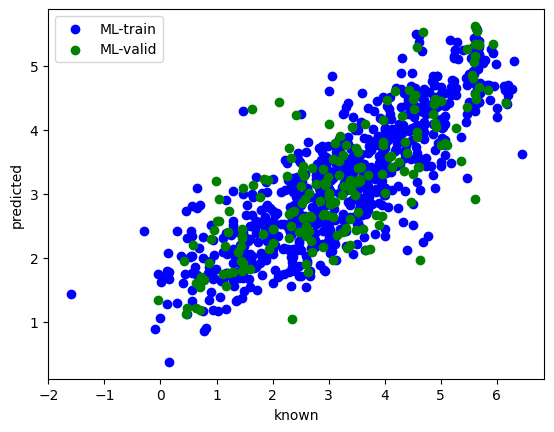

In [ ]:
maob_AL.make_learner()
maob_AL.learning_loop()